Imagine que você foi escalado para um time de investimentos e precisará realizar um modelo preditivo com dados da IBOVESPA para criar uma série temporal e prever diariamente o fechamento da base.

Para isso, utilize a base de dados contida no site da investing e selecione o período "diário", com o intervalo de tempo que achar adequado.

Você precisará demonstrar para o time de investimentos:

* o modelo com o storytelling, desde a captura do dado até a entrega do modelo
* justificar a técnica utilizada

*atingir uma acuracidade adequada (acima de 70%)

In [ ]:
#!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
import scipy.stats as stats

# Prophet
from prophet import Prophet


In [ ]:
import yfinance as yf

# Especifique o simbolo e o intervalo de datas desejado
symbol = '^BVSP'
start_date = '2020-01-01'
end_date = '2024-01-05'

coluna_data=['Date']

# Use a função download para obter os dados
df = yf.download(symbol, start=start_date, end=end_date)

df

In [ ]:
df = df.reset_index('Date')
df['Date'] = pd.to_datetime(df['Date']) #realizando a conversão da data para formato datetime
df.head()


In [ ]:

df.info()

In [ ]:
df_bkp = df

## Valores do fechamento - 2020 a 2024

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(df['Date'], df['Close'], label='Ibovespa')

plt.legend(loc='best')
plt.show()

In [ ]:
df.info()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df_limpo = df                                                              # cópia do dataframe
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'])                        # transformando em datetime
df_limpo = df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close']) # Removendo colunas desnecessárias
df_limpo = df_limpo.set_index('Date')                                      # definindo data como índice

################################## Notas da análise de decomposição da série ########################################

# model='additive': Este parâmetro especifica o tipo de modelo utilizado na decomposição.

# Os dois tipos principais são:

# "additive" (modelo apropriado quando a magnitude da sazonalidade não varia com a tendência)
# "multiplicative" (modelo é mais apropriado quando a magnitude da sazonalidade varia com a tendência).

# period: Este é o período da sazonalidade. Ele especifica o número de observações em um ciclo sazonal.

######################################################################################################################

seasonplot = seasonal_decompose(df_limpo, model='multiplicative', period=5) #decopondo a série temporal
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1) #serie real
seasonplot.trend.plot(ax=ax2)    #tendencia
seasonplot.seasonal.plot(ax=ax3) #sazonalisade
seasonplot.resid.plot(ax=ax4)    #residuos
plt.tight_layout()

In [ ]:
df_limpo

# Análise anual - 23


In [ ]:
df_2023 = df_limpo.loc['2023-01-01':'2023-12-31']
seasonplot = seasonal_decompose(df_2023, model='multiplicative', period=5) #decopondo a série temporal
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1) #serie real
seasonplot.trend.plot(ax=ax2)    #tendencia
seasonplot.seasonal.plot(ax=ax3) #sazonalisade
seasonplot.resid.plot(ax=ax4)    #residuos
plt.tight_layout()

# Análise Anual - 22

In [ ]:
df_2022 = df_limpo.loc['2022-01-01':'2022-12-31']
seasonplot = seasonal_decompose(df_2022, model='multiplicative', period=5) #decopondo a série temporal
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1) #serie real
seasonplot.trend.plot(ax=ax2)    #tendencia
seasonplot.seasonal.plot(ax=ax3) #sazonalisade
seasonplot.resid.plot(ax=ax4)    #residuos
plt.tight_layout()

In [ ]:
#estacionaria é algo onde a media, variancia e covariancia são constantes. Caso varie, não é estacionária

#ADF Augmented Dickey Fuller - avaliar se existe ou nao estacionariedade na serie

#H0 - Hipótese Nula (não é estacionária)
#H1 - hipotese alternativa (rejeição da hipótese nula)

# p -value = 0.05 (5%), entao rejeitamos H0 com um nível de confiança de 95%




## Testando modelos clássicos: Média Móvel 📈⏳

Um algoritmo clássico para este tipo de problema é o da Média Móvel. Ele consiste em utilizar a **média de N dias observados para prever o próximo dia**. Vamos utilizar esta técnica para um N de 10 e de 20 dias.


In [ ]:
#Filtrando os dados
df = df.reset_index('Date')
df = pd.DataFrame(df[['Close','Date']])
df.set_index('Date', inplace=True)

#Filtrando os dados - 2023
df_2023 = df_2023.reset_index('Date')
df_2023 = pd.DataFrame(df_2023[['Close','Date']])
df_2023.set_index('Date', inplace=True)

In [ ]:
df

In [ ]:
df['MA_window_10'] = df['Close'].rolling(10).mean().shift() #média móvel em 10 dias
df['MA_window_20'] = df['Close'].rolling(20).mean().shift() #média móvel em 20 dias

#Rolling para deslocamento. Este parâmetro especifica o número de observações usadas para calcular a estatística
#shift é utilizado para deslocar o índice de DataFrame por um número especificado de períodos com uma freqüência de tempo opcional

df_2023['MA_window_10'] = df_2023['Close'].rolling(10).mean().shift() #média móvel em 10 dias
df_2023['MA_window_20'] = df_2023['Close'].rolling(20).mean().shift() #média móvel em 20 dias


In [ ]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['Close'], label='Close')
plt.plot(df['MA_window_10'], label='MA window 10 days')
plt.plot(df['MA_window_20'], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df_2023['Close'], label='Close')
plt.plot(df_2023['MA_window_10'], label='MA window 10 days')
plt.plot(df_2023['MA_window_20'], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

## Análise full

In [ ]:
limit = 300

df['MA_window_10_forward_10'] = np.NaN #preechendo com NaN os valores da coluna de MA_window_10_forward_10

def make_window(window_size, start_point):
    return [start_point+x for x in range(window_size)]  #realizando a janela de tempo

window_size = 10
forward_days = 10

# Iteração sobre a série temporal com uma janela deslizante
for index in range(window_size, len(df), forward_days):

    # Iteração para calcular a média móvel ponderada
    for i in range(0, forward_days):
        # Verifica se o índice atual está dentro dos limites da série temporal
        if index + i >= len(df):
            break

        # Criando duas janelas:
        # 1. Uma janela para a média móvel ('window_close')
        # 2. Uma janela para a série temporal original ('window_MA')
        window_close = make_window(window_size - i, index + i - window_size)
        window_MA = make_window(i, index)

        # Calculando a média móvel ponderada
        mean = pd.concat([df['Close'].iloc[window_close], df['MA_window_10_forward_10'].iloc[window_MA]]).mean(axis=0)

        # Atualizando o DataFrame com a média móvel ponderada
        df.iat[index + i, df.columns.get_loc('MA_window_10_forward_10')] = mean


plt.figure(figsize = (15,10))

size = len(df)-limit - (len(df)-limit)%forward_days

for index in range(size, len(df), forward_days):
    plt.plot(df['MA_window_10_forward_10'][index:index+forward_days], color='r')

plt.plot(df['Close'][-limit:], color='b', label='Close')
#plt.legend(loc='best')
plt.show()


Note que cada reta vermelha no gráfico representa uma previsão de 10 dias, baseado nos 10 dias anteriores. Por isso elas são descontínuas.

Este tipo de abordagem é muito simplista. Isto porque o verdadeiro objetivo é prever N dias a frente para ver qual será o comportamento da ação. E ambos algoritmos falham nessa função. Vamos testar mais um clássico? Vamos analisar como o ARIMA funciona.

# Testando o modelo com prophet 🔮

O prophet é uma ferramenta de previsão para séries temporais desenvolvida pelo Facebook. O Prophet é especialmente projetado para lidar com **séries temporais que possuem padrões sazonais fortes e vários pontos de mudança**.

O Prophet é um vidente, capaz de entender e prever tendências, sazonalidades e feriados.🔮 Mágico né?

O Prophet se destaca em sua capacidade de lidar com dados faltantes, tendências que mudam ao longo do tempo e até mesmo feriados! Ele foi projetado para ser flexível e intuitivo, tornando a previsão de séries temporais uma tarefa mais simples, mesmo para aqueles que não são especialistas em estatística.


## Separando os dados em treino e teste

In [104]:
df.drop
symbol = '^BVSP'
start_date = '2018-01-01'
end_date = '2024-01-05'

# Use a função download para obter os dados
df = yf.download(symbol, start=start_date, end=end_date)
df = df.reset_index('Date')
df['Date'] = pd.to_datetime(df['Date']) #realizando a conversão da data para formato datetime
df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'], inplace=True)
df[['ds','y']] = df[['Date','Close']]
df.head()


train_data = df.sample(frac=0.8, random_state=0)
test_data = df.drop(train_data.index)
print(f'training data size : {train_data.shape}')
print(f'testing data size : {test_data.shape}')

[*********************100%%**********************]  1 of 1 completed

training data size : (1191, 4)
testing data size : (298, 4)


In [105]:
modelo = Prophet(daily_seasonality=True)
modelo.fit(train_data)
dataFramefuture = modelo.make_future_dataframe(periods=30, freq='D')
previsao = modelo.predict(dataFramefuture)

previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

13:09:08 - cmdstanpy - INFO - Chain [1] start processing
13:09:08 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1191,2024-01-05,124882.395377,117936.475765,131642.977134
1192,2024-01-06,124303.558809,116850.377153,131371.926735
1193,2024-01-07,124422.736289,117280.738796,131292.642257
1194,2024-01-08,124771.775052,117972.195862,131982.800690
1195,2024-01-09,125429.980084,118438.893290,132987.018222
1196,2024-01-10,125272.027060,117770.410810,132587.510213
1197,2024-01-11,125730.969328,118764.712964,132632.794145
1198,2024-01-12,125753.512515,118705.942022,133134.552497
1199,2024-01-13,125190.695201,118189.123178,132219.878350
1200,2024-01-14,125321.475965,117850.781543,132694.166988


In [106]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(modelo, previsao)

/Users/keitibaggio/anaconda3/envs/timeseries_3_9/lib/python3.9/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



/Users/keitibaggio/anaconda3/envs/timeseries_3_9/lib/python3.9/site-packages/prophet/plot.py:71: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/keitibaggio/anaconda3/envs/timeseries_3_9/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



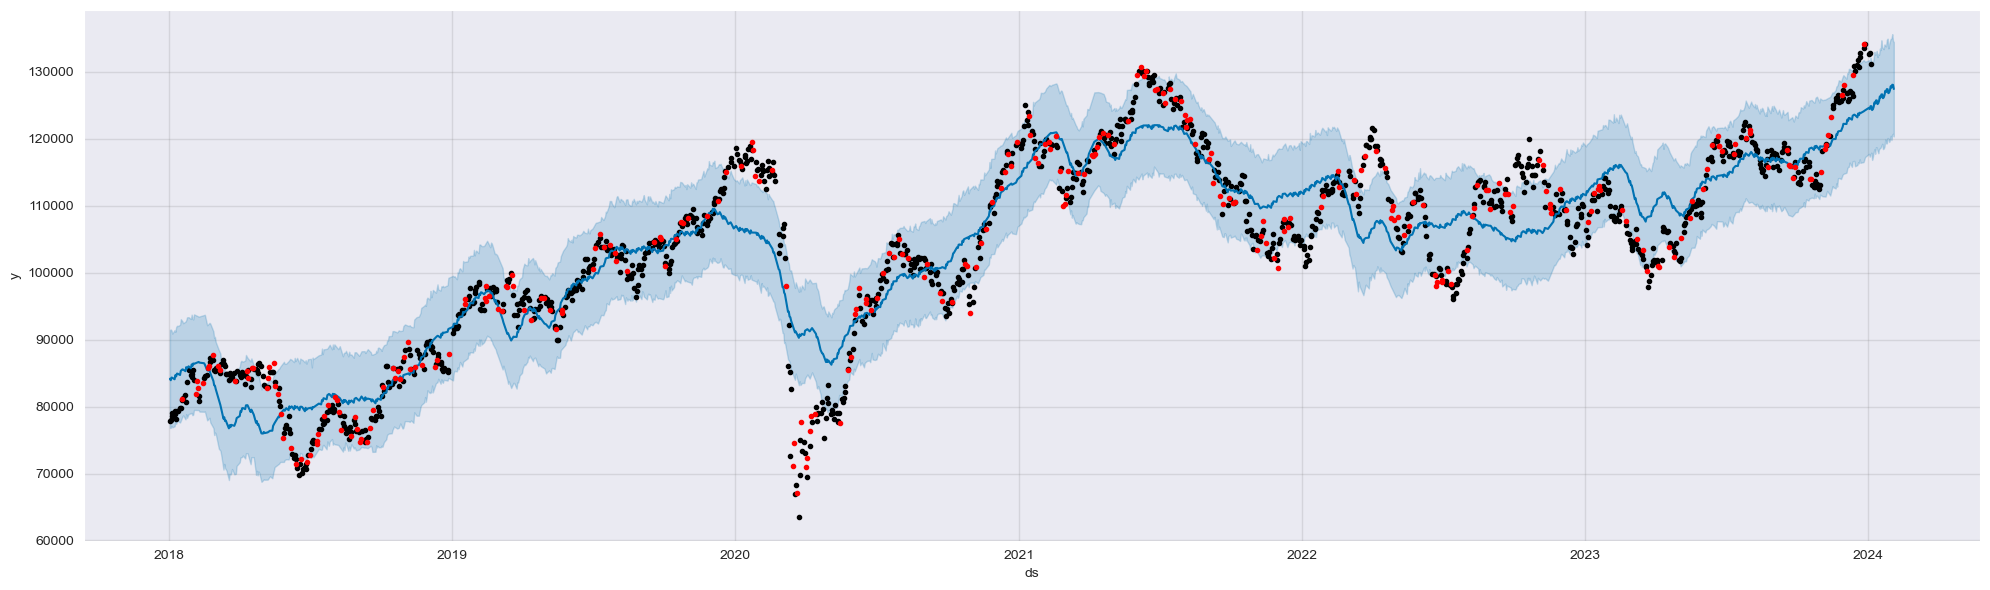

In [107]:
modelo.plot(previsao, figsize=(20,6));
plt.plot(test_data['ds'], test_data['y'], '.r')

In [108]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(modelo, previsao)

In [109]:
from prophet.plot import add_changepoints_to_plot

modelo_changepoints = Prophet(n_changepoints=5)
modelo_changepoints.fit(train_data)
dataFramefuture = modelo_changepoints.make_future_dataframe(periods=30, freq='D')
previsao_changepoints = modelo_changepoints.predict(dataFramefuture)
previsao_changepoints.head()

13:09:15 - cmdstanpy - INFO - Chain [1] start processing
13:09:15 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,77387.441570,69366.810575,89850.324463,77387.441570,77387.441570,3049.571054,3049.571054,3049.571054,133.728506,133.728506,133.728506,2915.842548,2915.842548,2915.842548,0.0,0.0,0.0,80437.012624
1,2018-01-03,77422.274234,69614.107806,90634.751907,77422.274234,77422.274234,2614.452830,2614.452830,2614.452830,-394.039033,-394.039033,-394.039033,3008.491863,3008.491863,3008.491863,0.0,0.0,0.0,80036.727064
2,2018-01-04,77457.106898,70353.019327,91474.844439,77457.106898,77457.106898,3455.876881,3455.876881,3455.876881,346.395357,346.395357,346.395357,3109.481524,3109.481524,3109.481524,0.0,0.0,0.0,80912.983779
3,2018-01-05,77491.939561,70669.679232,91520.007318,77491.939561,77491.939561,3418.739639,3418.739639,3418.739639,200.733477,200.733477,200.733477,3218.006162,3218.006162,3218.006162,0.0,0.0,0.0,80910.679201
4,2018-01-08,77596.437553,69819.508126,91516.356793,77596.437553,77596.437553,2903.751899,2903.751899,2903.751899,-674.709485,-674.709485,-674.709485,3578.461385,3578.461385,3578.461385,0.0,0.0,0.0,80500.189452


/Users/keitibaggio/anaconda3/envs/timeseries_3_9/lib/python3.9/site-packages/prophet/plot.py:71: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/keitibaggio/anaconda3/envs/timeseries_3_9/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



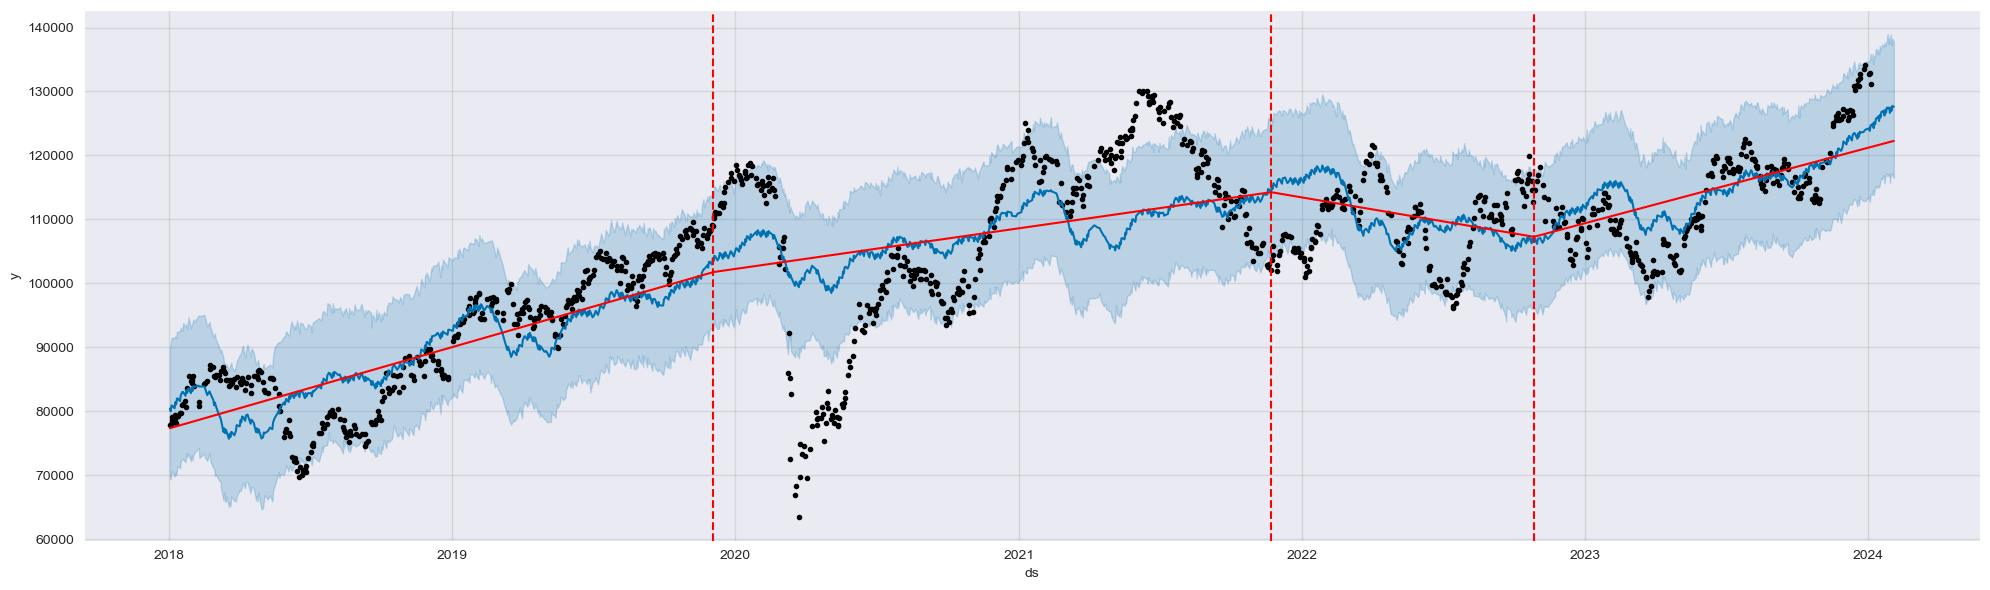

In [110]:
fig = modelo_changepoints.plot(previsao_changepoints, figsize=(20,6));
a = add_changepoints_to_plot(fig.gca(), modelo_changepoints, previsao_changepoints)

In [111]:
# Extrair as colunas relevantes dos DataFrames
previsao_cols = ['ds', 'yhat']
valores_reais_cols = ['ds', 'y']

previsao = previsao[previsao_cols]
valores_reais = train_data[valores_reais_cols]

# Mesclar os DataFrames nas colunas 'ds' para comparar previsões e valores reais
resultados = pd.merge(previsao, valores_reais, on='ds', how='inner')

# Calcular o erro percentual absoluto para cada ponto de dados
resultados['erro_percentual_absoluto'] = np.abs((resultados['y'] - resultados['yhat']) / resultados['y']) * 100

# Calcular o MAPE
mape = np.mean(resultados['erro_percentual_absoluto'])

print(f"MAPE: {mape:.2f}%")

MAPE: 4.36%


In [ ]:
X=df.Close.values

In [ ]:
result=adfuller(X)

In [ ]:
print("Teste ADF")
print(f"Teste Estatistico: {result[0]}")
print(f"P-Value: : {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
    print(f"\t{key}: {value}")

In [ ]:
ma = df.rolling(12).mean()

f, ax = plt.subplots()
df.plot(ax=ax, legend=False)

ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

In [113]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)

ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()


TypeError: ufunc 'log' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

NameError: name 'df_log' is not defined

In [ ]:
X_s = df_s.Último.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatistico: {result_s[0]}")
print(f"P-Value: : {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
    print(f"\t{key}: {value}")

In [ ]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()

std_diff = df_diff.rolling(12).std()

f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)

ma_diff.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

X_diff = df_diff.Último.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatistico: {result_diff[0]}")
print(f"P-Value: : {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
    print(f"\t{key}: {value}")